In [3]:
import os
import pandas as pd

In [4]:
base_data_dir = "/projects/belongielab/people/vsl333"
cvqa_dir = f"{base_data_dir}/cvqa"
ds_dir = f"{cvqa_dir}/ds"

Read CVQA data

In [5]:
metadata_file = os.path.join(cvqa_dir, 'metadata.csv')
images_dir = os.path.join(cvqa_dir, 'images')

In [6]:
metadata_df = pd.read_csv(metadata_file)
metadata_df.head()

,ID,Subset,Question,Translated Question,Options,Translated Options,Label,Category,Image Type,Image Source,License,Image File Name
0,5865780764275338482_0,"('Igbo', 'Nigeria')",Kedụ onye nwe ụlọ ọrụ maka ụgbọ elu a?,Who is the owner of the company for this airpl...,"['Chimamanda Ngozi Adiche', 'Aliko Dangote', '...","['Chimamanda Ngozi Adiche', 'Aliko Dangote', '...",-1,Vehicles and Transportation,External,https://commons.wikimedia.org/wiki/File:Air_Pe...,CC BY-SA 2.0,5865780764275338482_0.png
1,5865942534277063316_0,"('Oromo', 'Ethiopia')",Nyaanni aadaa Oromoo kun maal jedhama?,What is this Oromo traditional dish called?,"['Cuukkoo', 'Ancootee', 'Marqaa', 'Cumboo']","['Chuko', 'Anchote', 'Porridge', 'Chumbo']",-1,Cooking and food,Self,Self-research_only,CC BY-NC,5865942534277063316_0.png
2,5920593584278358540_1,"('Hindi', 'India')",राजेंद्र प्रसाद का जन्म किस वर्ष में हुआ था?,In which year the individual shown in the imag...,"['1884', '1886', '1885', '1887']","['1884', '1886', '1885', '1887']",-1,Public Figure and pop culture,External,https://commons.wikimedia.org/wiki/File:Rajend...,CC BY-SA 2.0,5920593584278358540_1.png
3,5865784464274975600_2,"('Mongolian', 'Mongolia')",'Топ донж' брэндын юуны брэнд вэ?,What brand is 'Top Donj'?,"['Эртны эдлэлийн дэлгүүр', 'Гоо сайханы бүтээг...","['Antique shop', 'Cosmetics brand', 'Model age...",-1,Brands / products / companies,Self,Self-open,CC BY-SA,5865784464274975600_2.png
4,5920948914273396866_1,"('Swahili', 'Kenya')",Katika eneo gani la Kenya mtu anayeonyeshwa kw...,In which region of Kenya is the person in the ...,"['Naivasha', 'Kamba', 'Mombasa', 'Eldoret']","['Naivasha', 'Kamba', 'Mombasa', 'Eldoret']",-1,Public Figure and pop culture,External,https://upload.wikimedia.org/wikipedia/commons...,CC BY-SA 3.0,5920948914273396866_1.png


In [7]:
metadata_df["Category"].value_counts()

Category
Geography / buildings / landmarks    1855
Cooking and food                     1834
Traditions / art / history           1588
Public Figure and pop culture        1172
Objects / materials / clothing        794
People and everyday life              777
Plants and animal                     659
Brands / products / companies         647
Vehicles and Transportation           567
Sports and recreation                 481
Name: count, dtype: int64

In [8]:
import ast

metadata_updatedf = metadata_df.copy()
# create anew coulumn "country" which is second element of "Subset" column
metadata_updatedf.insert(metadata_updatedf.columns.get_loc("Subset") + 1, "country", metadata_updatedf["Subset"].apply(lambda x: ast.literal_eval(x)[1]))
metadata_updatedf.insert(metadata_updatedf.columns.get_loc("Subset") + 1, "language", metadata_updatedf["Subset"].apply(lambda x: ast.literal_eval(x)[0]))
metadata_updatedf.head()


,ID,Subset,language,country,Question,Translated Question,Options,Translated Options,Label,Category,Image Type,Image Source,License,Image File Name
0,5865780764275338482_0,"('Igbo', 'Nigeria')",Igbo,Nigeria,Kedụ onye nwe ụlọ ọrụ maka ụgbọ elu a?,Who is the owner of the company for this airpl...,"['Chimamanda Ngozi Adiche', 'Aliko Dangote', '...","['Chimamanda Ngozi Adiche', 'Aliko Dangote', '...",-1,Vehicles and Transportation,External,https://commons.wikimedia.org/wiki/File:Air_Pe...,CC BY-SA 2.0,5865780764275338482_0.png
1,5865942534277063316_0,"('Oromo', 'Ethiopia')",Oromo,Ethiopia,Nyaanni aadaa Oromoo kun maal jedhama?,What is this Oromo traditional dish called?,"['Cuukkoo', 'Ancootee', 'Marqaa', 'Cumboo']","['Chuko', 'Anchote', 'Porridge', 'Chumbo']",-1,Cooking and food,Self,Self-research_only,CC BY-NC,5865942534277063316_0.png
2,5920593584278358540_1,"('Hindi', 'India')",Hindi,India,राजेंद्र प्रसाद का जन्म किस वर्ष में हुआ था?,In which year the individual shown in the imag...,"['1884', '1886', '1885', '1887']","['1884', '1886', '1885', '1887']",-1,Public Figure and pop culture,External,https://commons.wikimedia.org/wiki/File:Rajend...,CC BY-SA 2.0,5920593584278358540_1.png
3,5865784464274975600_2,"('Mongolian', 'Mongolia')",Mongolian,Mongolia,'Топ донж' брэндын юуны брэнд вэ?,What brand is 'Top Donj'?,"['Эртны эдлэлийн дэлгүүр', 'Гоо сайханы бүтээг...","['Antique shop', 'Cosmetics brand', 'Model age...",-1,Brands / products / companies,Self,Self-open,CC BY-SA,5865784464274975600_2.png
4,5920948914273396866_1,"('Swahili', 'Kenya')",Swahili,Kenya,Katika eneo gani la Kenya mtu anayeonyeshwa kw...,In which region of Kenya is the person in the ...,"['Naivasha', 'Kamba', 'Mombasa', 'Eldoret']","['Naivasha', 'Kamba', 'Mombasa', 'Eldoret']",-1,Public Figure and pop culture,External,https://upload.wikimedia.org/wikipedia/commons...,CC BY-SA 3.0,5920948914273396866_1.png


In [9]:
metadata_updatedf["country"].value_counts()

country
India          1323
Indonesia      1160
Ethiopia        448
France          405
Bulgaria        371
Ecuador         362
Ireland         326
Mexico          323
Spain           318
Uruguay         315
Malaysia        315
Mongolia        312
China           311
Romania         302
Norway          299
South Korea     290
Brazil          284
Kenya           273
Argentina       265
Colombia        241
Rwanda          235
Chile           234
Sri_Lanka       225
Pakistan        216
Singapore       212
Japan           203
Philippines     203
Egypt           203
Russia          200
Nigeria         200
Name: count, dtype: int64

Plot 1 random image of each country

In [10]:
# remove duplicated "Image File Name" rows. keep only one

# For each country, choose one random row per "Category" column.
metadata_random = metadata_updatedf.groupby(["Category", "country"]).apply(lambda x: x.sample(1, random_state=1)).reset_index(drop=True)
metadata_random.head()

/tmp/ipykernel_258028/2908223999.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metadata_random = metadata_updatedf.groupby(["Category", "country"]).apply(lambda x: x.sample(1, random_state=1)).reset_index(drop=True)


,ID,Subset,language,country,Question,Translated Question,Options,Translated Options,Label,Category,Image Type,Image Source,License,Image File Name
0,5865906694272932443_1,"('Spanish', 'Argentina')",Spanish,Argentina,¿Qué se compra principalmente en este lugar?,What is mainly purchased at this place?,"['Internet', 'Nafta', 'Canoas', 'Seguros']","['Internet', 'Gas', 'Canoes', 'Insurance']",-1,Brands / products / companies,Self,Self-open,CC BY-SA,5865906694272932443_1.png
1,5865921714276824661_0,"('Portuguese', 'Brazil')",Portuguese,Brazil,Qual a marca desse produto?,What brand is this product?,"['Brahma', 'Skol', 'Bauhaus', 'Budweiser']","['Brahma', 'Skol', 'Bauhaus', 'Budweiser']",-1,Brands / products / companies,External,https://commons.wikimedia.org/wiki/File:Cerver...,CC BY 3.0 br,5865921714276824661_0.png
2,5865943114272233247_1,"('Bulgarian', 'Bulgaria')",Bulgarian,Bulgaria,Какво е името на марката с това лого?,What is the name of the brand that has this logo?,"['Лукорски & Ко', 'ЛукОйл', 'Луковит', 'Лоеве ...","['Lukorski & Co', 'LukOil', 'Lukovit', 'Loewe ...",-1,Brands / products / companies,External,https://commons.wikimedia.org/wiki/File:Sofia_...,CC BY-SA 3.0,5865943114272233247_1.png
3,5865763634275157079_0,"('Spanish', 'Chile')",Spanish,Chile,¿Qué tipo de bebida aparece en la foto?,What type of beverage is shown in the photo?,"['Jugo', 'Agua', 'Jugo', 'Cerveza']","['Juice', 'Water', 'Bottle', 'Beer']",-1,Brands / products / companies,Self,Self-open,CC BY-SA,5865763634275157079_0.png
4,5865910674272283651_0,"('Chinese', 'China')",Chinese,China,这是什么品牌鞋子？,What brand of shoes are these?,"['耐克', '阿迪达斯', '乔丹', '李宁']","['Nike', 'Adidas', 'Jordan', 'Li Ning']",-1,Brands / products / companies,External,https://www.flickr.com/photos/ye-wa/6475934545...,Attribution License,5865910674272283651_0.png


In [11]:
metadata_random["country"].value_counts()

country
Argentina      10
Brazil         10
Bulgaria       10
Chile          10
China          10
Colombia       10
Ecuador        10
Egypt          10
Ethiopia       10
France         10
India          10
Indonesia      10
Ireland        10
Japan          10
Kenya          10
Malaysia       10
Mexico         10
Mongolia       10
Nigeria        10
Norway         10
Pakistan       10
Philippines    10
Rwanda         10
Singapore      10
South Korea    10
Spain          10
Uruguay        10
Sri_Lanka      10
Russia          8
Romania         8
Name: count, dtype: int64

In [12]:
metadata_random["Category"].unique()

array(['Brands / products / companies', 'Cooking and food',
       'Geography / buildings / landmarks',
       'Objects / materials / clothing', 'People and everyday life',
       'Plants and animal', 'Public Figure and pop culture',
       'Sports and recreation', 'Traditions / art / history',
       'Vehicles and Transportation'], dtype=object)

Download the random samples of each country

In [13]:
# for each country in df, copy image from images_dir to current directory under country name folder
import shutil, os
from pathlib import Path
from tqdm import tqdm

src_dir = Path("/projects/belongielab/people/vsl333/cvqa/images")
img_copy_dir = Path("/home/vsl333/cultural_values/cvqa_chosen/images")
# delete if img_copy_dir exists
if os.path.exists(img_copy_dir.parent):
    print(f"Dir existed! Deleting {img_copy_dir.parent}")
    shutil.rmtree(img_copy_dir.parent)
os.makedirs(img_copy_dir, exist_ok=True)

img_data = []
for country in tqdm(metadata_random["country"].unique()):
    country_df = metadata_random[metadata_random["country"] == country]
    for idx, row in country_df.iterrows():
        img_file = src_dir / row["Image File Name"]
        category = row["Category"]
        category = category.strip().split("/")[0].strip().replace(" ", "_")
        output_img_file = img_copy_dir / f"{country}_{category}_{row['Image File Name']}"
        # print(f"Copying {img_file} to {output_img_file}")
        shutil.copy(img_file, output_img_file)
        img_data.append([row["ID"], row["language"], row["country"], row["Category"], row["Image File Name"], output_img_file])

# create a csv file with "Id", "language", "country", "Category", "Image File Name" columns
data_df= pd.DataFrame(img_data, columns=["id", "language", "country", "category", "og_image_file_name", "image_path"])
metadata_csv_file = img_copy_dir.parent / "metadata.csv"
data_df.to_csv(metadata_csv_file, index=False)
print(f"Saved metadata.csv to {metadata_csv_file}")

Dir existed! Deleting /home/vsl333/cultural_values/cvqa_chosen


100%|██████████| 30/30 [00:11<00:00,  2.60it/s]

Saved metadata.csv to /home/vsl333/cultural_values/cvqa_chosen/metadata.csv


Plot some images

['Brazil', 'Mexico']


/tmp/ipykernel_258028/1915507852.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  img_file = os.path.join(img_copy_dir, f"{country}_{category}_{metadata_random[metadata_random['country'] == country][metadata_random['Category'] == category]['Image File Name'].values[0]}")


FileNotFoundError: [Errno 2] No such file or directory: '/home/vsl333/cultural_values/cvqa_chosen/images/Brazil_Brands / products / companies_5865921714276824661_0.png'

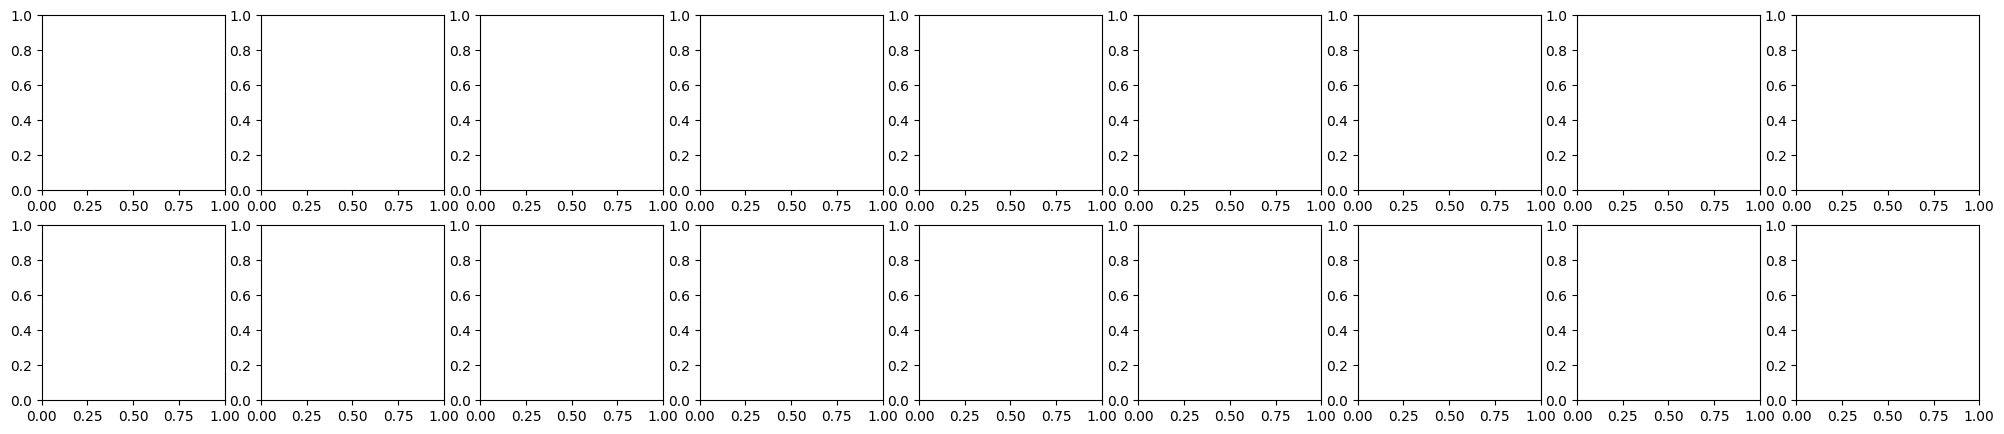

In [16]:
# Plot images in img_copy_dir/country/category. Choose any two random countries
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

country_list = metadata_random["country"].unique()
random_countries = random.sample(list(country_list), 2)
print(random_countries)

fig, ax = plt.subplots(2, 9, figsize=(25, 5))
for i, country in enumerate(random_countries):
    for j, category in enumerate(metadata_random["Category"].unique()):
        if j >= 9:  # Ensure we don't exceed the number of subplots
            break
        img_file = os.path.join(img_copy_dir, f"{country}_{category}_{metadata_random[metadata_random['country'] == country][metadata_random['Category'] == category]['Image File Name'].values[0]}")
        img = mpimg.imread(img_file)
        ax[i, j].imshow(img)
        ax[i, j].set_title(f"{country} - {category}", fontsize=7)
        ax[i, j].axis("off")


Plot these images

In [16]:
# image_file_names = ["5920593594279170230_2.png", "5920943064271671717_1.png", "5920593844271777115_1.png"]
# new_filtered_df = filtered_df[filtered_df["Image File Name"].isin(image_file_names)]
# new_filtered_df